In [110]:
from sqlalchemy import create_engine
from sqlalchemy import inspect
import pandas as pd
import seaborn as sns


In [128]:
engine = create_engine('sqlite:///C:\\Users\hp1020\Desktop\mta_data.db')


In [129]:
insp = inspect(engine)
print(insp.get_table_names())


['mta_data']


In [117]:
mta_data = pd.read_sql('SELECT * FROM mta_data LIMIT 10;', engine) #Loading the dataframe
mta_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,03:00:00,REGULAR,7672966,2645023
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,23:00:00,REGULAR,7673128,2645283
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/19/2021,03:00:00,REGULAR,7673141,2645289
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/19/2021,07:00:00,REGULAR,7673146,2645299
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/19/2021,11:00:00,REGULAR,7673153,2645360
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/19/2021,15:00:00,REGULAR,7673179,2645407


In [118]:
mta_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [121]:
mta_data.columns = [column.strip().title() for column in mta_data.columns] #Reformatting the columns
mta_data.columns

Index(['C/A', 'Unit', 'Scp', 'Station', 'Linename', 'Division', 'Date', 'Time',
       'Desc', 'Entries', 'Exits'],
      dtype='object')

In [134]:
mta_daily = (mta_data.groupby(["C/A", "Unit", "Scp", "Station", "Date"],as_index=False)
                        .Entries.first())
mta_daily.head(10)

,C/A,Unit,Scp,Station,Date,Entries
0,A002,R051,02-00-00,59 ST,12/18/2021,7672966
1,A002,R051,02-00-00,59 ST,12/19/2021,7673141


In [87]:
mta_daily[["Previous_Date", "Previous_Entries"]] = (mta_daily
                                                       .groupby(["C/A", "Unit", "Scp", "Station"])[["Date", "Entries"]]
                                                       .shift(1))
mta_daily.head(20)                               #Creating new columns

,C/A,Unit,Scp,Station,Date,Entries,Previous_Date,Previous_Entries
0,A002,R051,02-00-00,59 ST,12/18/2021,7672966,NaN,NaN
1,A002,R051,02-00-00,59 ST,12/19/2021,7673141,12/18/2021,7672966.0
2,A002,R051,02-00-00,59 ST,12/20/2021,7673254,12/19/2021,7673141.0
3,A002,R051,02-00-00,59 ST,12/21/2021,7673573,12/20/2021,7673254.0
4,A002,R051,02-00-00,59 ST,12/22/2021,7673883,12/21/2021,7673573.0
5,A002,R051,02-00-00,59 ST,12/23/2021,7674196,12/22/2021,7673883.0
6,A002,R051,02-00-00,59 ST,12/24/2021,7674483,12/23/2021,7674196.0
7,A002,R051,02-00-01,59 ST,12/18/2021,6786074,NaN,NaN
8,A002,R051,02-00-01,59 ST,12/19/2021,6786270,12/18/2021,6786074.0
9,A002,R051,02-00-01,59 ST,12/20/2021,6786413,12/19/2021,6786270.0


In [91]:
mta_daily.dropna(subset=["Previous_Date"], axis=0, inplace=True)
mta_daily.head()                                                         #Dropping NaN values

,C/A,Unit,Scp,Station,Date,Entries,Previous_Date,Previous_Entries
1,A002,R051,02-00-00,59 ST,12/19/2021,7673141,12/18/2021,7672966.0
2,A002,R051,02-00-00,59 ST,12/20/2021,7673254,12/19/2021,7673141.0
3,A002,R051,02-00-00,59 ST,12/21/2021,7673573,12/20/2021,7673254.0
4,A002,R051,02-00-00,59 ST,12/22/2021,7673883,12/21/2021,7673573.0
5,A002,R051,02-00-00,59 ST,12/23/2021,7674196,12/22/2021,7673883.0


In [93]:
(mta_daily["Entries"] - mta_daily["Previous_Entries"]).describe()

count     14.000000
mean     245.214286
std       91.598773
min      113.000000
25%      151.750000
50%      287.000000
75%      317.500000
max      354.000000
dtype: float64

In [114]:
mta_daily["Daily_Entries"] = (mta_daily["Entries"] - mta_daily["Previous_Entries"])    #Subtracting the two columns to find how many new people entered the station for each day
mta_daily.Date.unique()

array(['12/19/2021', '12/20/2021', '12/21/2021', '12/22/2021',
       '12/23/2021', '12/24/2021'], dtype=object)

In [96]:
station_daily = mta_daily.groupby(["Station", "Date"])[['Daily_Entries']].sum().reset_index()   #Sum of Daily entries for each station
station_daily.head()

,Station,Date,Daily_Entries
0,59 ST,12/19/2021,515.0
1,59 ST,12/20/2021,372.0
2,59 ST,12/21/2021,673.0
3,59 ST,12/22/2021,642.0
4,59 ST,12/23/2021,657.0


<AxesSubplot:xlabel='Date', ylabel='Daily_Entries'>

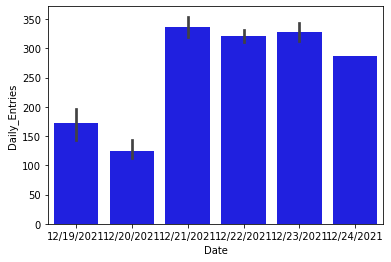

In [108]:
sns.barplot(x="Date", y="Daily_Entries", data=mta_daily, color="blue")   #MVP

In [98]:
station_totals = station_daily.groupby('Station')['Daily_Entries'].sum() \  #Sum of total ridership for each station for each week
    .reset_index() \
    .sort_values('Daily_Entries', ascending=False)

station_totals.head()

,Station,Daily_Entries
0,59 ST,3433.0


In [44]:
mta_data.drop(['C/A', 'Unit', 'Scp', 'Division', 'Desc'], axis=1, inplace=True, errors = 'ignore' ) #Dropping the C/A, Unit, SCP, and Division columns


In [45]:
mta_data.head()  #find the differences in entries for each time of day to find what time my chosen stations have the most traffic

,Station,Linename,Date,Time,Entries,Exits
0,59 ST,NQR456W,12/18/2021,03:00:00,7672966,2645023
1,59 ST,NQR456W,12/18/2021,07:00:00,7672969,2645040
2,59 ST,NQR456W,12/18/2021,11:00:00,7672991,2645127
3,59 ST,NQR456W,12/18/2021,15:00:00,7673037,2645193
4,59 ST,NQR456W,12/18/2021,19:00:00,7673097,2645270


In [99]:
(mta_data
 .groupby(["Station", "Date", "Time"])                       #Checking to verify columns are unique
 .Entries.count()
 .reset_index()
 .sort_values("Entries", ascending=False)),head()

KeyError: 'Station'